<a href="https://colab.research.google.com/github/manekaM/ML_Coursework_2425574/blob/main/MACHINE_LEARNING_COURSEWORK_20232954_2425574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING THE DATASET TO THE DATAFRAME

In [1]:
#Importing Pandas Library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset to the pandas Dataframe
sp_df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
sp_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Number of rows and columns in the data set
sp_df.shape
print("Shape of this dataset is",sp_df.shape)

Shape of this dataset is (7043, 21)


In [5]:
#Checking for the data types of each column
sp_df.dtypes
print("Data types of each column are:\n", sp_df.dtypes)

Data types of each column are:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [23]:
#Handling missing values
sp_df["TotalCharges"] = pd.to_numeric(sp_df["TotalCharges"], errors="coerce")

# Drop rows with missing values
sp_df = sp_df.dropna()
print("Missing values have been handled")

Missing values have been handled


In [7]:
# Dropping the column customerID
sp_df = sp_df.drop("customerID", axis=1)

#TASK 1 - EDA

In [8]:
#QUICK EXPLORATION
sp_df.head(3) #Displays the first three rows of the dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:
# Displays a summary of the DataFrame including index range, column names,
# number of non-null values, data types, and memory usage
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [10]:
# Shows summary statistics for numerical columns(count, mean, std, min, quartiles, max)
sp_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#Gets the value count of churn
sp_df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


Text(0.5, 1.0, 'Churn Rate')

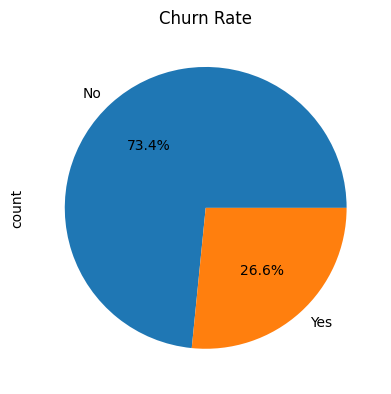

In [12]:
#Churn Rate Pie Chart
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sp_df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Churn Rate')

According to the above pie chart majority of the customers do not churn

Class Inbalnce is identified and stratified split is needed

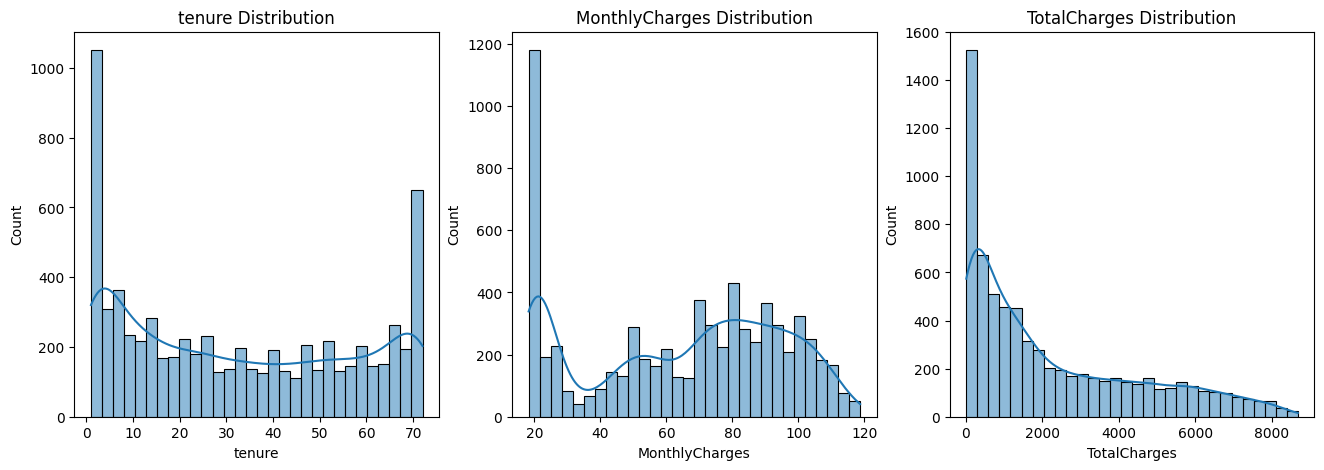

In [13]:
#Histograms for Tenure, monthly charges, total charges distributions
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(16,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(sp_df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
plt.show()

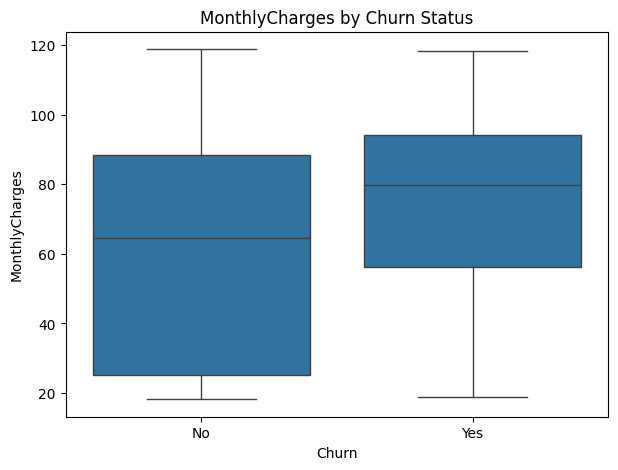

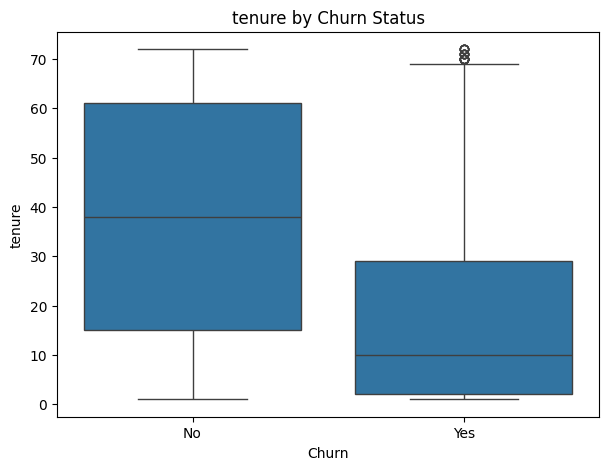

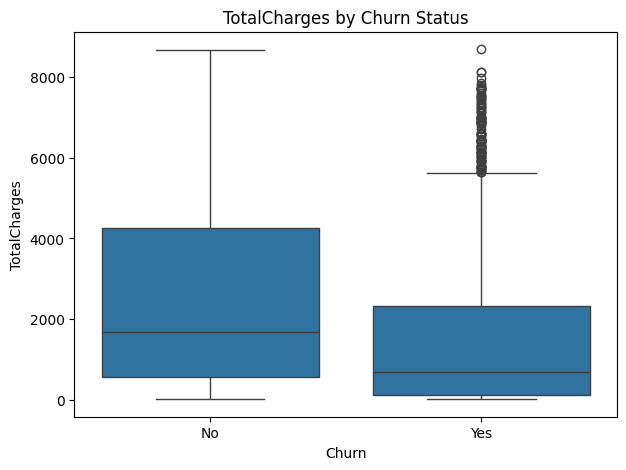

In [14]:
#Box Plots for Monthly charges, Tenure by churn status
for col in ['MonthlyCharges', 'tenure', 'TotalCharges']:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=sp_df, x='Churn', y=col)
    plt.title(f"{col} by Churn Status")
    plt.show()

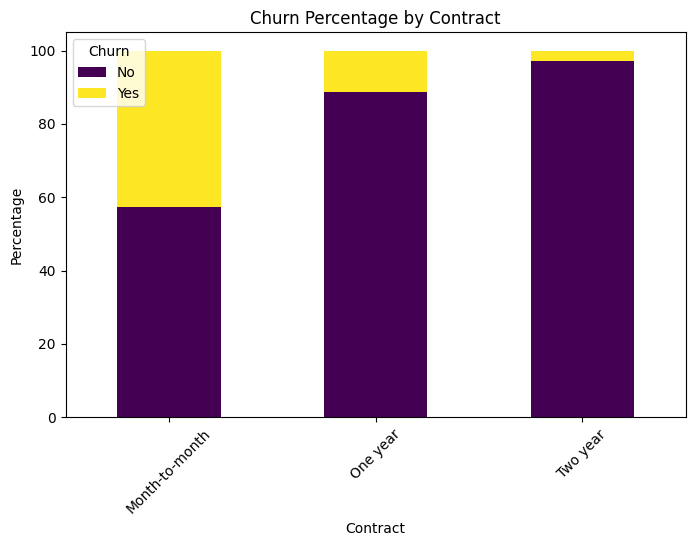

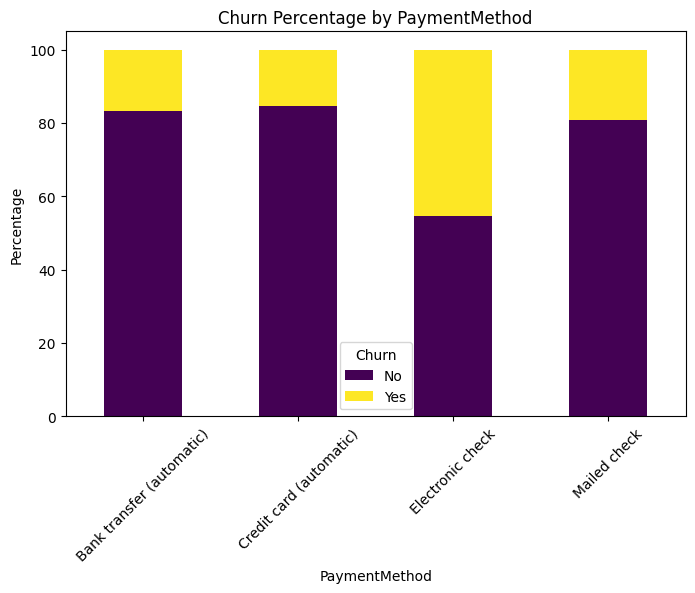

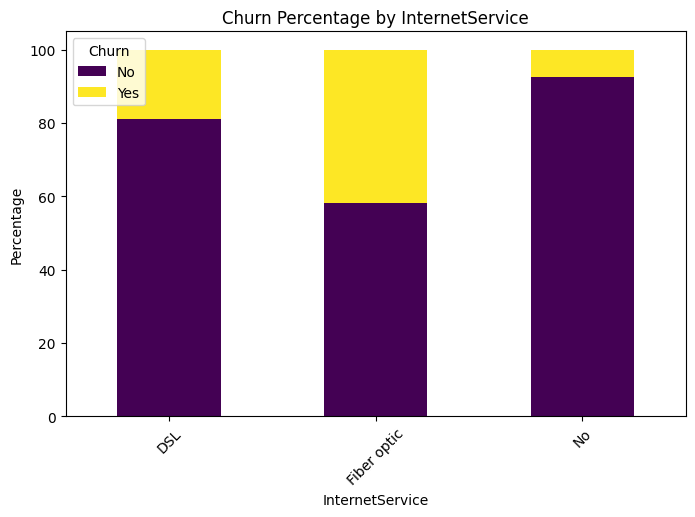

In [15]:
def stacked_churn(col):
    temp = pd.crosstab(sp_df[col], sp_df['Churn'], normalize='index') * 100
    temp.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
    plt.title(f"Churn Percentage by {col}")
    plt.ylabel("Percentage")
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()

stacked_cols = ['Contract', 'PaymentMethod', 'InternetService']

for col in stacked_cols:
    stacked_churn(col)

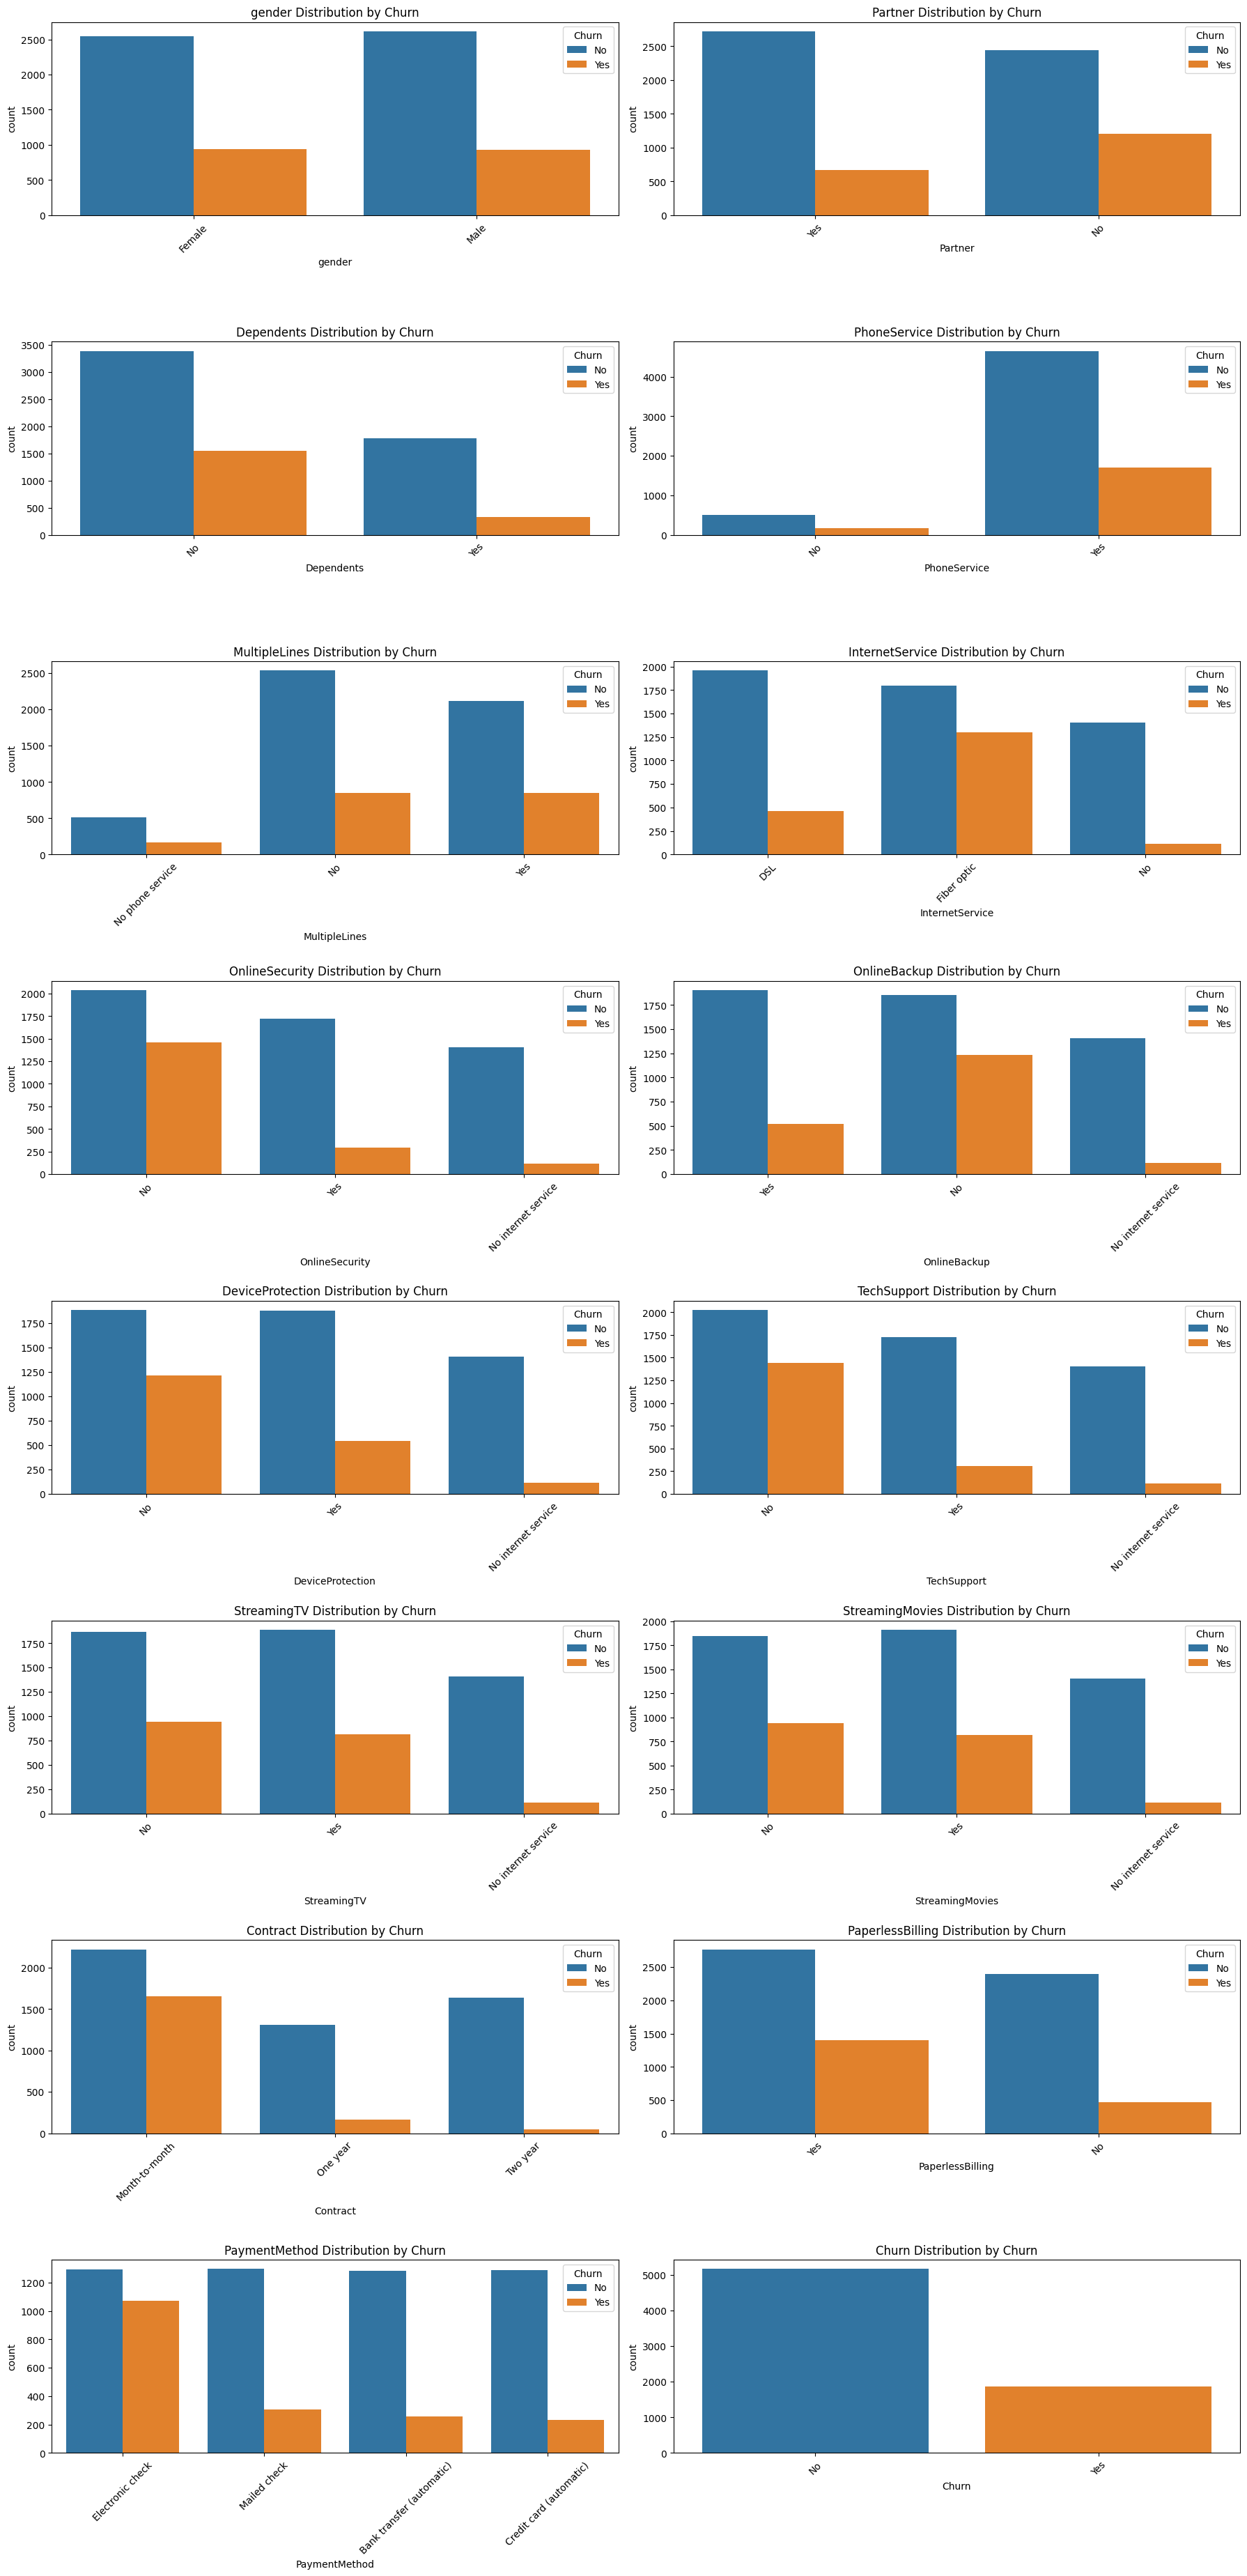

In [16]:
#Count Plots for all categorical variables
cat_cols = sp_df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(18, 40))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2 + 1, 2, i)
    sns.countplot(data=sp_df, x=col, hue='Churn')
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

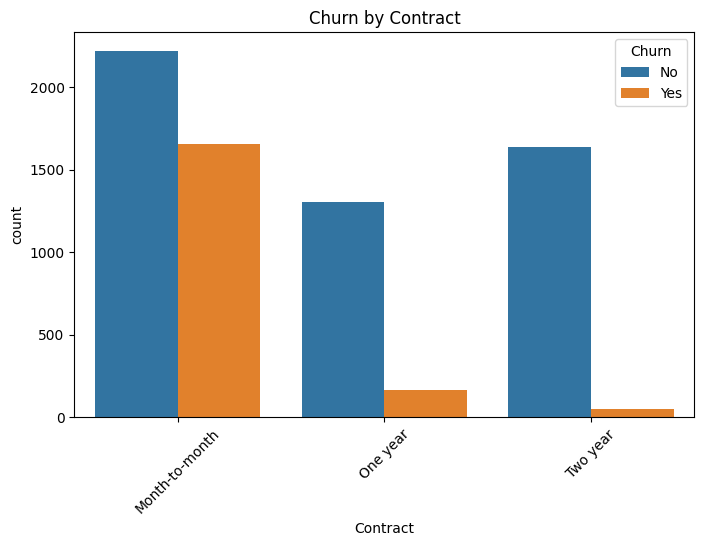

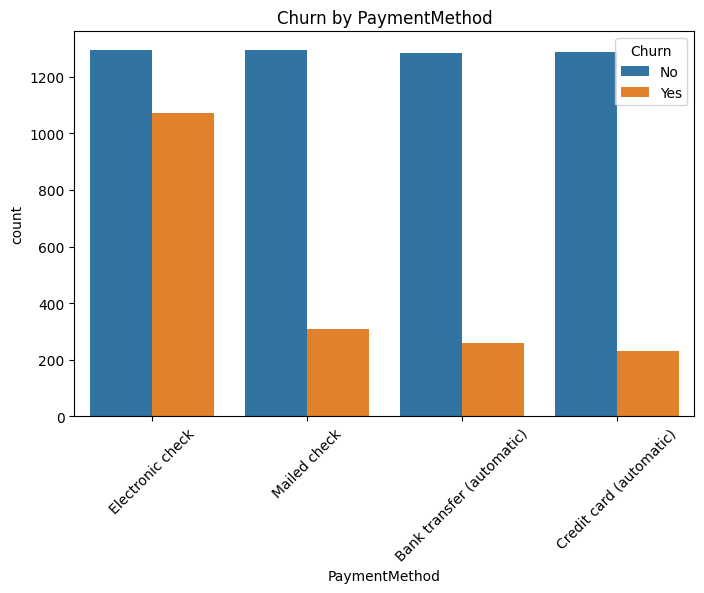

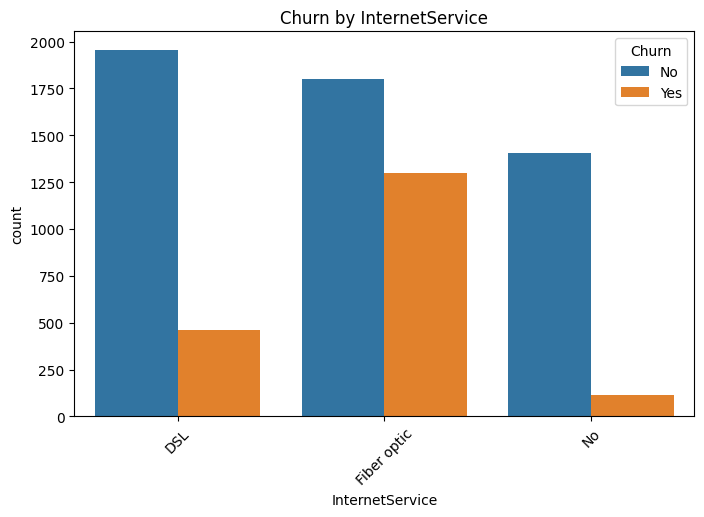

In [17]:
#Grouped bar charts for all churn by Categoriacal Features
cat_features = ['Contract', 'PaymentMethod', 'InternetService']

for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(data=sp_df, x=col, hue='Churn')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

From the above plots it is identified:


*   Month-to-month contracts has the highest churn rate.
*   Electronic check payment method users show higher churn rate compared ti mailed check, bank transfer and credit card users.
* Fiber optic users tend to churn more than the DSL users.

In [18]:
# Encode Churn for correlation
df_corr = sp_df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

# Select numerical columns
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Calculate correlation matrix
correlation_matrix = df_corr[num_cols].corr()
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150541 -0.354049        0.192858     -0.199484   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
Churn           1.000000  


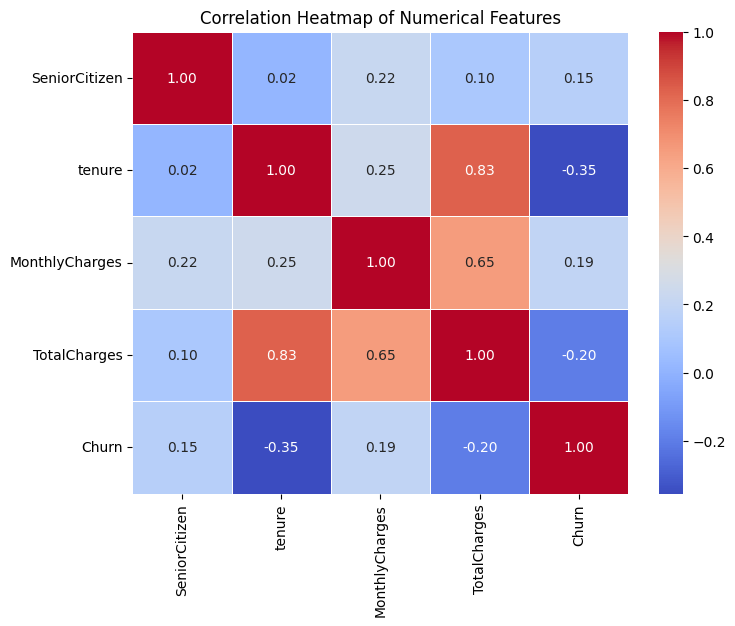

In [19]:
#Correlation heat map
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


EDA Insights:
- Dataset has 7043 rows and 21 columns.
- Churn rate:73.5%(Not churn)  and 26.5%(churn) [Class imbalance is visible and stratified split needed].
- Tenure: Shorter tenure correlates with churn.
- Monthly Charges: Higher the charges higher the churn rate.
- Contract: Month-to-month has highest churn.
- Internet: Fiber optic has higher churn than DSL..
- Correlation: Tenure negatively correlates with Churn (-0.35); MonthlyCharges: When higher charges are applied churn increased.
- Gender shows similar age distributions, but slight differences in survival rates for young females ( no strong gender difference).

#TASK 02

DATA PREPROCESSING

In [26]:
#DATA PREPROCESSING
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert target variable to 0 and 1
le = LabelEncoder()
sp_df['Churn'] = le.fit_transform(sp_df['Churn'])  # Yes=1, No=0

# Separate features and target
X = sp_df.drop('Churn', axis=1)
y = sp_df['Churn']

# One-hot encode categorical columns, scale numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols   = X.select_dtypes(exclude=['object']).columns

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.440327,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.440327,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.440327,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.440327,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [27]:
#Spliting the dataset into test data and train data
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Handling imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Churn Rate')

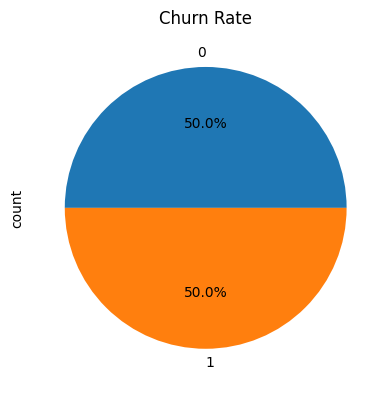

In [29]:
#Pie chart after handling imbalance

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
y_train_res.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Churn Rate')

Neural Network Model

In [30]:
#Libraries needed for Neural Network (Keras/TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
print("Building Neural Network...")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping so it doesn't overtrain
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_res, y_train_res,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Predict
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()



Building Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6919 - loss: 0.5791 - val_accuracy: 0.7476 - val_loss: 0.6336
Epoch 2/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7610 - loss: 0.5081 - val_accuracy: 0.7506 - val_loss: 0.5966
Epoch 3/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7732 - loss: 0.4786 - val_accuracy: 0.7433 - val_loss: 0.6125
Epoch 4/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 0.4596 - val_accuracy: 0.7343 - val_loss: 0.6022
Epoch 5/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7781 - loss: 0.4656 - val_accuracy: 0.7458 - val_loss: 0.5810
Epoch 6/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.4744 - val_accuracy: 0.7433 - val_loss: 0.5724
Epoch 7/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7782 - loss: 0.4649 - val_accuracy: 0.7512 - val_loss: 0.5422
Epoch 8/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 0.4629 - val_accu

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Predictions (you already have these)
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()

# Test metrics
test_accuracy = accuracy_score(y_test, y_pred_nn)
test_auc = roc_auc_score(y_test, y_pred_nn_prob)

# Training metrics (on full training set)
y_train_pred_prob = model.predict(X_train_res)
train_accuracy = accuracy_score(y_train_res, (y_train_pred_prob > 0.5))
train_auc = roc_auc_score(y_train_res, y_train_pred_prob)

# From history (last epoch)
final_val_accuracy = history.history['val_accuracy'][-1]

print("Neural Network Performance")
print(f"Training Accuracy:   {train_accuracy:.4f}")
print(f"Training ROC-AUC:    {train_auc:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Test Accuracy:       {test_accuracy:.4f}")
print(f"Test ROC-AUC:        {test_auc:.4f}")

# First, get predictions on the TRAINING data (same threshold 0.5)
y_train_pred_prob = model.predict(X_train_res)
y_train_pred_nn = (y_train_pred_prob > 0.5).astype(int).flatten()

# Training Classification Report
print("Classification Report (Training Set)")
print(classification_report(y_train_res, y_train_pred_nn, target_names=['Class 0', 'Class 1']))

# Test Classification Report
print("Classification Report (Test Set)")
print(classification_report(y_test, y_pred_nn, target_names=['Class 0', 'Class 1']))

# Confusion matrix for better insight
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Performance
Training Accuracy:   0.8113
Training ROC-AUC:    0.8988
Validation Accuracy: 0.8105
Test Accuracy:       0.7704
Test ROC-AUC:        0.8248
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (Training Set)
              precision    recall  f1-score   support

     Class 0       0.79      0.84      0.82      4130
     Class 1       0.83      0.78      0.81      4130

    accuracy                           0.81      8260
   macro avg       0.81      0.81      0.81      8260
weighted avg       0.81      0.81      0.81      8260

Classification Report (Test Set)
              precision    recall  f1-score   support

     Class 0       0.87      0.80      0.84      1033
     Class 1       0.56      0.68      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Results of the neural network
print("\nNeural Network Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_nn):.3f} ({accuracy_score(y_test, y_pred_nn)*100:.2f}%)")
print(f"Precision: {precision_score(y_test, y_pred_nn):.3f} ({precision_score(y_test, y_pred_nn)*100:.2f}%)")
print(f"Recall   : {recall_score(y_test, y_pred_nn):.3f} ({recall_score(y_test, y_pred_nn)*100:.2f}%)")
print(f"F1 Score : {f1_score(y_test, y_pred_nn):.3f} ({f1_score(y_test, y_pred_nn)*100:.2f}%)")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_nn_prob):.3f} ({roc_auc_score(y_test, y_pred_nn_prob)*100:.2f}%)")



Neural Network Results
Accuracy : 0.770 (77.04%)
Precision: 0.556 (55.58%)
Recall   : 0.679 (67.91%)
F1 Score : 0.611 (61.13%)
ROC-AUC  : 0.825 (82.48%)


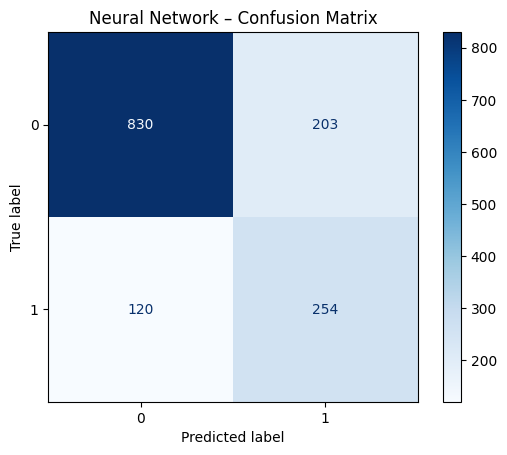

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion matrix for the neural network results
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Blues')
plt.title('Neural Network – Confusion Matrix')
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


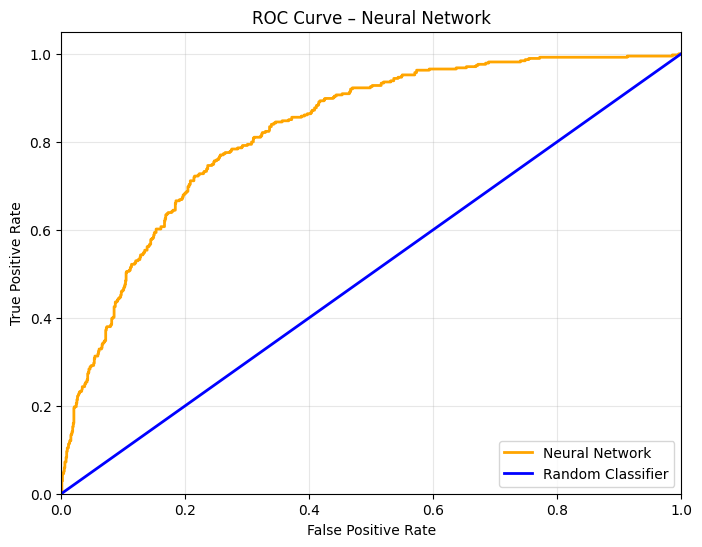

In [35]:
from sklearn.metrics import roc_curve
#ROC curve for the neural network

# Get probability scores from the neural network
y_prob_nn = model.predict(X_test).flatten()  # already between 0 and 1

# Calculate ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2,
         label=f'Neural Network')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Neural Network')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

DECISION TREE IMPLEMENTATION

In [36]:
#Decision true with hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Training Decision Tree")

#Defining parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Base model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

#Grid search
grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_res, y_train_res) #fit

best_dt = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Predict & evaluate
y_pred_dt = best_dt.predict(X_test)

print("\nDecision Tree Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.3f} ({accuracy_score(y_test, y_pred_dt)*100:.2f}%)")
print(f"Precision: {precision_score(y_test, y_pred_dt):.3f} ({precision_score(y_test, y_pred_dt)*100:.2f}%)")
print(f"Recall   : {recall_score(y_test, y_pred_dt):.3f} ({recall_score(y_test, y_pred_dt)*100:.2f}%)")
print(f"F1 Score : {f1_score(y_test, y_pred_dt):.3f} ({f1_score(y_test, y_pred_dt)*100:.2f}%)")
print(f"ROC-AUC  : {roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1]):.3f} ({roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1])*100:.2f}%)")



Training Decision Tree
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree Results
Accuracy : 0.739 (73.92%)
Precision: 0.507 (50.69%)
Recall   : 0.684 (68.45%)
F1 Score : 0.582 (58.25%)
ROC-AUC  : 0.777 (77.71%)


In [50]:
from sklearn.metrics import (accuracy_score, roc_auc_score,
                             classification_report, confusion_matrix)

# Predictions on both train and test
y_train_pred_dt = best_dt.predict(X_train_res)
y_test_pred_dt  = best_dt.predict(X_test)

y_train_proba_dt = best_dt.predict_proba(X_train_res)[:, 1]
y_test_proba_dt  = best_dt.predict_proba(X_test)[:, 1]

# Accuracy
train_accuracy = accuracy_score(y_train_res, y_train_pred_dt)
test_accuracy  = accuracy_score(y_test, y_test_pred_dt)

# ROC-AUC
train_auc = roc_auc_score(y_train_res, y_train_proba_dt)
test_auc  = roc_auc_score(y_test, y_test_proba_dt)

# Print

print("DECISION TREE - FULL PERFORMANCE SUMMARY")
print(f"Training Accuracy : {train_accuracy:.4f} ({train_accuracy*100:6.2f}%)")
print(f"Test Accuracy     : {test_accuracy:.4f}  ({test_accuracy*100:6.2f}%)")
print(f"Training ROC-AUC  : {train_auc:.4f} ({train_auc*100:6.2f}%)")
print(f"Test ROC-AUC      : {test_auc:.4f}  ({test_auc*100:6.2f}%)")

print("\nClassification Report (Training Set)")
print(classification_report(y_train_res, y_train_pred_dt, target_names=['Class 0', 'Class 1']))

print("Classification Report (Test Set)")
print(classification_report(y_test, y_test_pred_dt, target_names=['Class 0', 'Class 1']))


DECISION TREE - FULL PERFORMANCE SUMMARY
Training Accuracy : 0.8568 ( 85.68%)
Test Accuracy     : 0.7392  ( 73.92%)
Training ROC-AUC  : 0.9318 ( 93.18%)
Test ROC-AUC      : 0.7771  ( 77.71%)

Classification Report (Training Set)
              precision    recall  f1-score   support

     Class 0       0.88      0.82      0.85      4130
     Class 1       0.83      0.89      0.86      4130

    accuracy                           0.86      8260
   macro avg       0.86      0.86      0.86      8260
weighted avg       0.86      0.86      0.86      8260

Classification Report (Test Set)
              precision    recall  f1-score   support

     Class 0       0.87      0.76      0.81      1033
     Class 1       0.51      0.68      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407



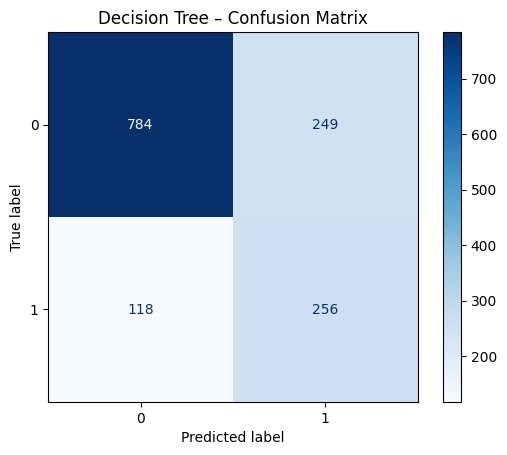

In [37]:
# Confusion matrix for decision tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')
plt.title('Decision Tree – Confusion Matrix')
plt.show()

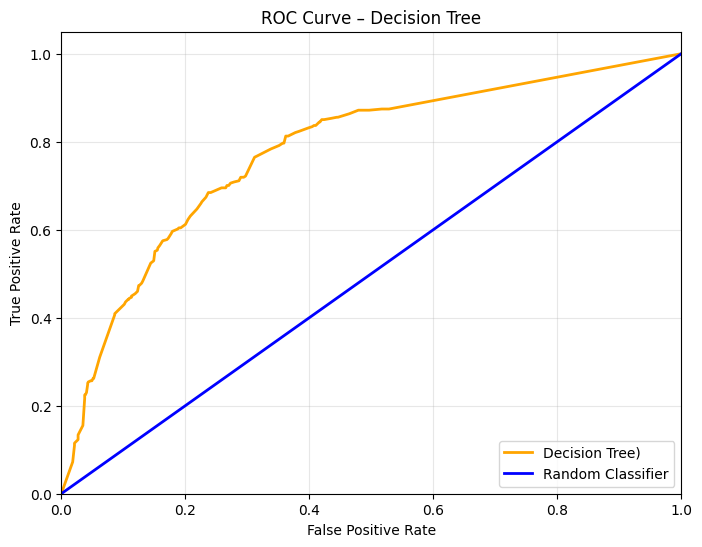

In [38]:
# ROC Curve – Decision Tree
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get probability scores for the positive class (Churn = Yes)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2,
         label=f'Decision Tree)')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Decision Tree')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

MODEL COMPARISON

In [39]:
#Model Comparison
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_nn)],
    'Precision': [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_nn)],
    'Recall': [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_nn)],
    'F1-Score': [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_nn)],
    'ROC-AUC': [roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1]), roc_auc_score(y_test, y_pred_nn_prob)]
})

results.round(3)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Decision Tree,0.739,0.507,0.684,0.582,0.777
1,Neural Network,0.770,0.556,0.679,0.611,0.825


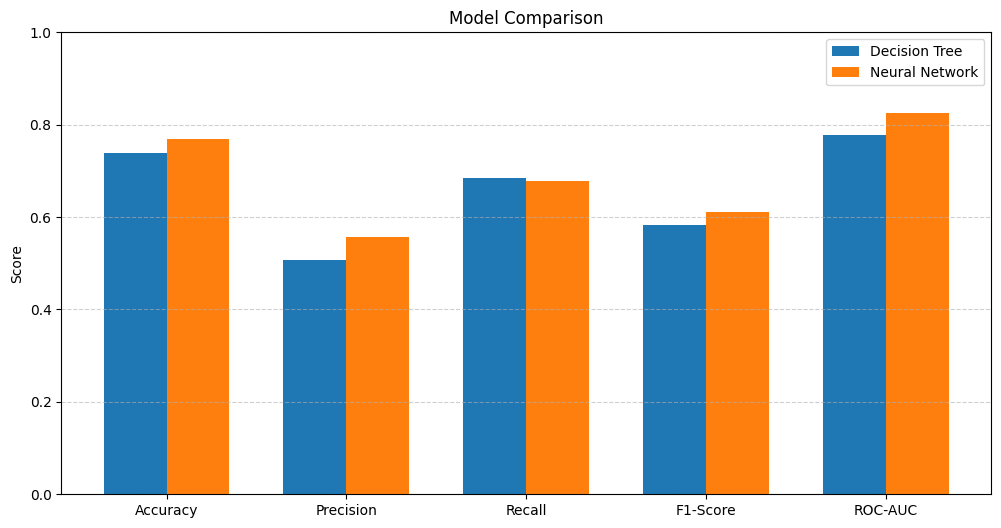

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Round results
results_rounded = results.round(3)

# Set figure size
plt.figure(figsize=(12, 6))

# Metrics (all except Model column)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# X-axis positions
x = np.arange(len(metrics))
width = 0.35

# Plot for each model
plt.bar(x - width/2, results_rounded.iloc[0, 1:], width, label='Decision Tree')
plt.bar(x + width/2, results_rounded.iloc[1, 1:], width, label='Neural Network')

# Labels and title
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend()

plt.ylim(0, 1)  # Because these are metrics between 0–1
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


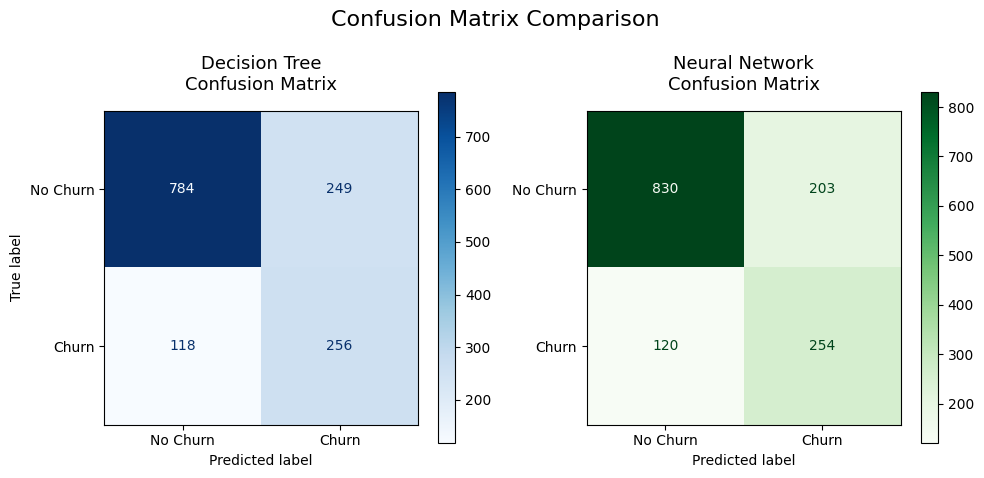

In [41]:
# Confusion Matrices side by side for comparison
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set small figure size (great for reports
plt.rcParams['figure.figsize'] = (10, 4.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dt,
    cmap='Blues',
    display_labels=['No Churn', 'Churn'],
    ax=ax1
)
ax1.set_title('Decision Tree\nConfusion Matrix', fontsize=13, pad=15)

# Neural Network Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nn,
    cmap='Greens',
    display_labels=['No Churn', 'Churn'],
    ax=ax2
)
ax2.set_title('Neural Network\nConfusion Matrix', fontsize=13, pad=15)

# Remove y-label from the right plot to save space
ax2.set_ylabel('')

plt.suptitle('Confusion Matrix Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


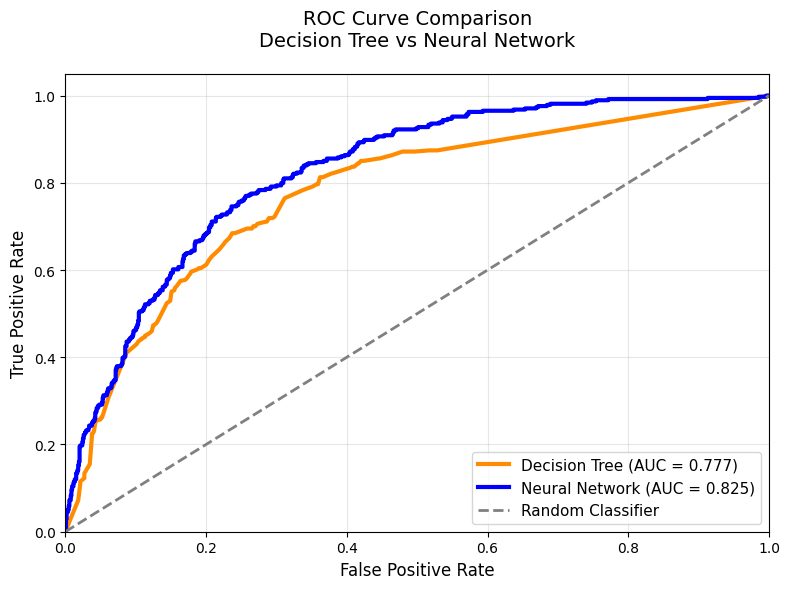

Decision Tree AUC : 0.7771
Neural Network AUC: 0.8248


In [42]:
#Both curves in one plot
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]           # Decision Tree
y_prob_nn = model.predict(X_test).flatten()               # Neural Network

# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot both on the same figure
plt.figure(figsize=(8, 6))

plt.plot(fpr_dt, tpr_dt,
         color='darkorange', linewidth=3,
         label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')

plt.plot(fpr_nn, tpr_nn,
         color='blue', linewidth=3,
         label=f'Neural Network (AUC = {roc_auc_nn:.3f})')

# Random classifier line
plt.plot([0, 1], [0, 1], color='gray', linewidth=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison\nDecision Tree vs Neural Network', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Decision Tree AUC : {roc_auc_dt:.4f}")
print(f"Neural Network AUC: {roc_auc_nn:.4f}")

From the above visualisations it is proved that Neural Network Model has high model accuracy than Decision Tree model

#TASK 03

AI Ethics and Strategies
1.	Fairness
•	Checked that sensitive attributes have almost no correlation with churn which lowers the risk of discrimination.
•	Used F1-score and ROC-AUC(balanced metrics) instead of accuracy alone.

2.	Transparency and Explainability
•	Decision Tree is fully interpretable as we can show feature importance.
•	Neural Network is a black box.

3.	Privacy
•	The dataset does not contain any personal identifiers.

4.	Bias Mitigation
•	Did not use gender or age directly as the main driver. Model decisions are based on service usage.

5.	Post-deployment Plan
•	Monitors monthly ROC-AUC and recall on new data.
•	Retrain every 5-6 months when the performance drops.
•	Regular fairness audit using demographic party checks.
